In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from oauth2client.client import GoogleCredentials

from google.colab import auth as google_auth
google_auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive

# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# path = '/content/gdrive/MyDrive/OULAD_analysis/'
path = '/content/gdrive/MyDrive/IIT Chicago /Coursework /OULAD_analysis/'

assessments = pd.read_csv(path + "assessments.csv")

courses = pd.read_csv(path + "courses.csv")

student_assessment = pd.read_csv(path + "studentAssessment.csv")

student_info = pd.read_csv(path + "studentInfo.csv")

student_registration = pd.read_csv(path + "studentRegistration.csv")

student_vle = pd.read_csv(path + "studentVle.csv")

vle = pd.read_csv(path + "vle.csv")

In [ ]:
domains=pd.DataFrame(
    {
        "code_module": ["AAA", "BBB", "CCC", "DDD", "EEE", "FFF", "GGG"],
        "domain": [
            "Social Sciences",
            "Social Sciences",
            "STEM",
            "STEM",
            "STEM",
            "STEM",
            "Social Sciences",
        ],
    },
)

In [ ]:
from shutil import rmtree
from tempfile import mkdtemp

import numpy as np
import pandas as pd
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from IPython.display import display
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PowerTransformer



In [ ]:
student_info=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/studentInfo.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
assessment=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/assessments.csv")

In [ ]:
courses=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/courses.csv")

In [ ]:
student_assessment=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/studentAssessment.csv")

In [ ]:
student_registration=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/studentRegistration.csv")

In [ ]:
student_vle=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/studentVle.csv")

In [ ]:
vle=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/vle.csv")

In [ ]:

feature_table = (
    vle.query("code_module == 'BBB' and code_presentation in ['2013B', '2013J']")
    .drop(columns=["code_module", "code_presentation"])
    .merge(student_vle[["id_student", "id_site", "sum_click"]], on="id_site")
    .groupby(["id_student", "activity_type"])
    .agg({"sum_click": ["sum", "count"]})
    .pivot_table(
        values="sum_click",
        index="id_student",
        columns="activity_type",
        fill_value=0,
    )
    .pipe(lambda df: setattr(df, "columns", df.columns.map("_".join)) or df)
    .join(
        student_info.query(
            "code_module == 'BBB' and code_presentation in ['2013B', '2013J']"
        )
        .loc[:, ["id_student", "final_result", "code_presentation"]]
        .assign(final_result=lambda df: df.final_result.isin(["Pass", "Distinction"]))
        .set_index("id_student")
    )
)
display(feature_table)

,count_forumng,count_glossary,count_homepage,count_oucollaborate,count_oucontent,count_ouelluminate,count_quiz,count_resource,count_sharedsubpage,count_subpage,...,sum_oucollaborate,sum_oucontent,sum_ouelluminate,sum_quiz,sum_resource,sum_sharedsubpage,sum_subpage,sum_url,final_result,code_presentation
id_student,,,,,,,,,,,,,,,,,,,,,
23629,24,0,16,0,0,0,15,2,0,2,...,0,0,0,31,2,0,5,0,False,2013B
23798,76,1,77,3,6,0,48,16,0,33,...,3,44,0,104,21,0,47,56,True,2013J
25107,321,1,114,0,1,1,45,13,0,14,...,0,1,1,85,23,0,21,14,True,2013B
27759,47,2,46,0,6,0,32,17,0,24,...,0,17,0,88,19,0,35,15,False,2013J
27891,56,0,20,0,1,0,19,6,0,6,...,0,1,0,38,6,0,11,6,False,2013B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685831,121,1,110,0,0,0,46,30,0,26,...,0,0,0,148,35,0,49,9,True,2013B
2691100,18,0,62,0,6,0,40,49,0,38,...,0,22,0,102,70,0,104,56,True,2013J
2691566,18,0,17,0,2,0,30,5,0,6,...,0,33,0,81,6,0,13,1,False,2013J


In [ ]:

# feature_table = (
#     vle.merge(student_vle[["id_student","code_module", "code_presentation", "id_site", "sum_click"]], on=["code_module", "code_presentation", "id_site"])
#     .groupby(["code_module", "code_presentation", "id_student", "activity_type"])
#     .agg({"sum_click": ["sum", "count"]})
#     .pivot_table(
#         values="sum_click",
#         index=["code_module", "code_presentation", "id_student"],
#         columns="activity_type",
#         fill_value=0,
#     )
#     .pipe(lambda df: setattr(df, "columns", df.columns.map("_".join)) or df)
#     .join(
#         student_info.loc[:, ["id_student", "final_result", "code_module", "code_presentation"]]
#         .assign(final_result=lambda df: df.final_result.isin(["Pass", "Distinction"]))
#         .set_index("id_student")
#     )
# )
# display(feature_table)

<Axes: xlabel='final_result'>

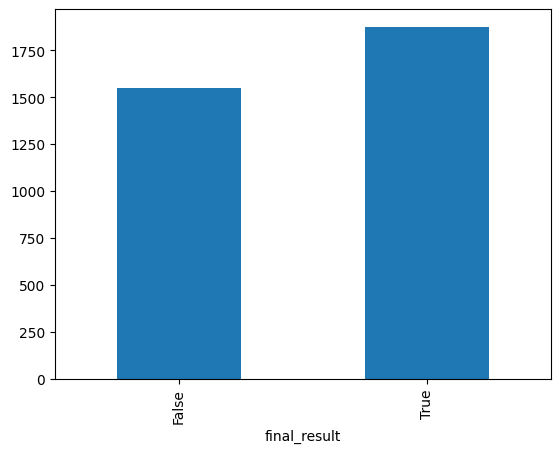

In [ ]:
feature_table.reset_index().groupby(['final_result']).size().plot.bar()

<Axes: xlabel='code_presentation'>

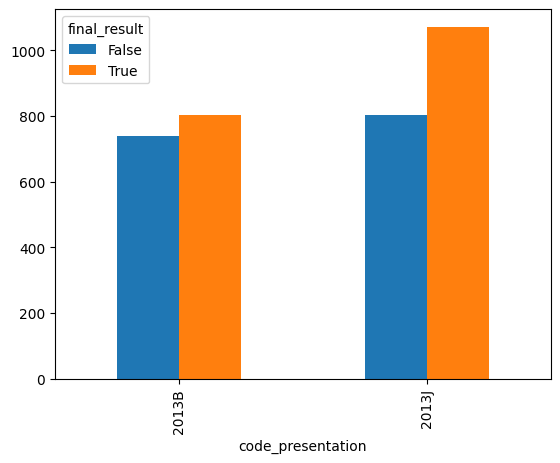

In [ ]:
feature_table.reset_index().groupby(['code_presentation', 'final_result'])[['id_student']].size().unstack().plot.bar()

In [ ]:
first_course_mask = feature_table["code_presentation"] == "2013B"
train_test_set = feature_table[first_course_mask].drop(columns="code_presentation")
x_train_test = train_test_set.drop(columns="final_result")
y_train_test = train_test_set.final_result.values
validation_set = feature_table[~first_course_mask].drop(columns="code_presentation")
x_validation = validation_set.drop(columns="final_result")
y_validation = validation_set.final_result.values

In [ ]:
# correlation wrt target

train_test_set_corr = train_test_set.corr()
rdf = train_test_set_corr[['final_result']]

px.imshow(
    rdf.T.round(2),
    title="Feature Correlation Matrix wrt target",
    text_auto=True,
    color_continuous_scale="greens",
    # width=800,
    # height=600,
).show()

In [ ]:
x_train_test_corr = x_train_test.corr()
px.imshow(
    x_train_test_corr.round(2),
    title="Feature Correlation Matrix before feature removal",
    text_auto=True,
    color_continuous_scale="greens",
    width=800,
    height=600,
).show()

In [ ]:
highly_correlated_features = (
    x_train_test_corr[(x_train_test_corr > 0.8)]
    .stack()
    .index.to_frame()
    .reset_index(drop=True)
    .pipe(lambda df: df[df[0] != df[1]])
    .apply(lambda col: "__".join(sorted([col[0], col[1]])), axis=1)
    .drop_duplicates(ignore_index=True)
    .map(lambda x: x.split("__")[0])
    .unique()
)
x_train_test = x_train_test.drop(columns=highly_correlated_features)
x_validation = x_validation.drop(columns=highly_correlated_features)
display(highly_correlated_features)

array(['count_forumng', 'count_glossary', 'count_homepage',
       'count_oucollaborate', 'count_ouelluminate', 'count_quiz',
       'count_resource', 'count_sharedsubpage', 'count_subpage',
       'count_url', 'sum_forumng', 'sum_resource'], dtype=object)

In [ ]:
px.imshow(
    x_train_test.corr().round(2),
    title="Feature Correlation Matrix after feature removal",
    text_auto=True,
    color_continuous_scale="greens",
    width=800,
    height=600,
).show()

In [ ]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.7 MB/s eta 0:00:00


In [ ]:
from typing import Iterator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from pyts.classification import TimeSeriesForest
from sklearn.model_selection import cross_val_score


In [ ]:
student_info[['final_result']].isin(["Fail", "Withdrawn"]).astype(int).value_counts()

final_result
1               17208
0               15385
Name: count, dtype: int64

In [ ]:
click_stream1.final_result.value_counts()

final_result
0    15382
1    13846
Name: count, dtype: int64

In [ ]:
click_stream1 = (
    # 1. Extract the number of clicks by students on the three types of material.
    vle.drop(["code_module", "code_presentation", "week_from", "week_to"], axis=1)
    .merge(student_vle, on="id_site")
    # 2. Sum the number of clicks each student makes on each type of material by day.
    .groupby(
        ["code_module", "code_presentation", "id_student", "date"]
    )
    .agg({"sum_click": "sum"})
    # 3. Align each student’s total clicks on each type of material by days.
    .pivot_table(
        values="sum_click",
        index=["code_module", "code_presentation", "id_student"],
        columns="date",
        fill_value=0.0,
    )
    # 4. Add the at-risk label, as `1`, otherwise as `0`.
    .join(
        student_info.filter(
            ["code_module", "code_presentation", "id_student", "final_result"]
        )
        .assign(final_result=lambda df: (df.final_result.isin(["Fail", "Withdrawn"])).astype(int))
        .set_index(["code_module", "code_presentation", "id_student"])
    )
)
display(click_stream1)

-25  -24  -23  -22  -21  -20  -19  \
code_module code_presentation id_student                                      
AAA         2013J             11391         0    0    0    0    0    0    0   
                              28400         0    0    0    0    0    0    0   
                              30268         0    0    0    0    0    0    0   
                              31604         0    0    0    0    0    0    0   
                              32885         0    0    0    0    0    0    0   
...                                       ...  ...  ...  ...  ...  ...  ...   
GGG         2014J             2640965       0    0    0    0    0    0    0   
                              2645731       0    0    0    0    0    0    0   
                              2648187       0    0    0    0    0    0    0   
                              2679821       0    0    0    0    0    0    0   
                              2684003       0    0    0    0    0    0    0   

                                          -18  -17  -16  ...  261  262  263  \
code_module code_presentation id_student                 ...                  
AAA         2013J             11391         0    0    0  ...    0    0    0   
                              28400         0    0    0  ...    0    0    0   
                              30268         0    0    0  ...    0    0    0   
                              31604         0    0    0  ...    1    0    0   
                              32885         0    0    0  ...    0    0    0   
...                                       ...  ...  ...  ...  ...  ...  ...   
GGG         2014J             2640965       0    0    0  ...    0    0    0   
                              2645731       0    0    0  ...    0    0    0   
                              2648187       0    0    0  ...    0    0    0   
                              2679821       0    0    0  ...    0    0    0   
                              2684003       0    0    0  ...    0    0    0   

                                          264  265  266  267  268  269  \
code_module code_presentation id_student                                 
AAA         2013J             11391         0    0    0    0    0    0   
                              28400         0    0    0    0    0    0   
                              30268         0    0    0    0    0    0   
                              31604         1    0    0    0    0    0   
                              32885         0    0    0    0    0    0   
...                                       ...  ...  ...  ...  ...  ...   
GGG         2014J             2640965       0    0    0    0    0    0   
                              2645731       0    0    0    0    0    0   
                              2648187       0    0    0    0    0    0   
                              2679821       0    0    0    0    0    0   
                              2684003       0    0    0    0    0    0   

                                          final_result  
code_module code_presentation id_student                
AAA         2013J             11391                  0  
                              28400                  0  
                              30268                  1  
                              31604                  0  
                              32885                  0  
...                                                ...  
GGG         2014J             2640965                1  
                              2645731                0  
                              2648187                0  
                              2679821                1  
                              2684003                0  

[29228 rows x 296 columns]

In [ ]:
# Dropout prediction by course

def get_scores_by_cdMod_cdPres() -> Iterator[list[float]]:
    """Computes accuracy prediction scores for each course."""
    for levels, course_df in click_stream1.groupby(
        level=["code_module", "code_presentation"]
    ):
        estimator = TimeSeriesForest(n_estimators=500)
        X = course_df.drop(columns="final_result").values
        y = course_df["final_result"].values
        mean_score = np.mean(
            cross_val_score(estimator, X, y, cv=10, scoring="accuracy", n_jobs=-1)
        )
        yield list(levels) + [mean_score]


results = pd.DataFrame(
    list(get_scores_by_cdMod_cdPres()),
    columns=["code_module", "code_presentation", "score"],
).pivot_table(
    values="score",
    index=["code_module"],
    columns="code_presentation",
)
display(Markdown("### Dropout prediction 10-fold cross-validation accuracy by course"))
display(results)

In [ ]:
results

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,NaN,0.931081,NaN,0.888254
BBB,0.898502,0.917647,0.905736,0.910454
CCC,NaN,NaN,0.929184,0.910107
DDD,0.897792,0.910083,0.935441,0.887690
EEE,NaN,0.965765,0.953559,0.960784
FFF,0.905960,0.943292,0.932535,0.948616
GGG,NaN,0.915218,0.914635,0.931284


In [ ]:
click_stream1.groupby(["code_module", "code_presentation"]).size().to_frame().pivot_table(
    values=0,
    index=["code_module"],
    columns="code_presentation",
)

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,NaN,378.0,NaN,357.0
BBB,1537.0,1870.0,1294.0,1921.0
CCC,NaN,NaN,1681.0,2302.0
DDD,1214.0,1768.0,1116.0,1647.0
EEE,NaN,964.0,624.0,1097.0
FFF,1510.0,2098.0,1363.0,2121.0
GGG,NaN,895.0,773.0,698.0
